<a href="https://colab.research.google.com/github/GunduSriBhanu/data690_fall2022/blob/main/assignment_05/assignment_05_07_DataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handling Missing values, duplicates and detecting outliers, Inter quartile range



# Missing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


What does "missing data" mean? What is a missing value? It depends on the origin of the data and the context it was generated. For example, for a survey, a _`Salary`_ field with an empty value, or a number 0, or an invalid value (a string for example) can be considered "missing data". These concepts are related to the values that Python will consider "Falsy":

In [2]:
falsy_values = (0, False, None, '', [], {})

For Python, all the values above are considered "falsy":

In [3]:
any(falsy_values)

False

Numpy has a special "nullable" value for numbers which is `np.nan`. It's _NaN_: "Not a number"

In [4]:
np.nan

nan

The `np.nan` value is kind of a virus. Everything that it touches becomes `np.nan`:

In [5]:
3 + np.nan

nan

In [6]:
a = np.array([1, 2, 3, np.nan, np.nan, 4])

In [7]:
a.sum()

nan

In [8]:
a.mean()

nan

For a numeric array, the `None` value is replaced by `np.nan`:

In [9]:
a = np.array([1, 2, 3, np.nan, None, 4], dtype='float')

In [10]:
a

array([ 1.,  2.,  3., nan, nan,  4.])

As we said, `np.nan` is like a virus. If you have any `nan` value in an array and you try to perform an operation on it, you'll get unexpected results:

In [11]:
a = np.array([1, 2, 3, np.nan, np.nan, 4])

In [12]:
a.mean()

nan

In [13]:
a.sum()

nan

Numpy also supports an "Infinite" type:

In [14]:
np.inf

inf

Which also behaves as a virus:

In [15]:
3 + np.inf

inf

In [16]:
np.inf / 3

inf

In [17]:
np.inf / np.inf

nan

In [18]:
b = np.array([1, 2, 3, np.inf, np.nan, 4], dtype=np.float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [19]:
b.sum()

nan



### Checking for `nan` or `inf`

There are two functions: `np.isnan` and `np.isinf` that will perform the desired checks:

In [20]:
np.isnan(np.nan)

True

In [21]:
np.isinf(np.inf)

True

And the joint operation can be performed with `np.isfinite`.

In [22]:
np.isfinite(np.nan), np.isfinite(np.inf)

(False, False)

`np.isnan` and `np.isinf` also take arrays as inputs, and return boolean arrays as results:

In [23]:
np.isnan(np.array([1, 2, 3, np.nan, np.inf, 4]))

array([False, False, False,  True, False, False])

In [24]:
np.isinf(np.array([1, 2, 3, np.nan, np.inf, 4]))

array([False, False, False, False,  True, False])

In [25]:
np.isfinite(np.array([1, 2, 3, np.nan, np.inf, 4]))

array([ True,  True,  True, False, False,  True])

_Note: It's not so common to find infinite values. From now on, we'll keep working with only `np.nan`_



### Filtering them out

Whenever you're trying to perform an operation with a Numpy array and you know there might be missing values, you'll need to filter them out before proceeding, to avoid `nan` propagation. We'll use a combination of the previous `np.isnan` + boolean arrays for this purpose:

In [26]:
a = np.array([1, 2, 3, np.nan, np.nan, 4])

In [27]:
a[~np.isnan(a)]

array([1., 2., 3., 4.])

Which is equivalent to:

In [28]:
a[np.isfinite(a)]

array([1., 2., 3., 4.])

And with that result, all the operation can be now performed:

In [29]:
a[np.isfinite(a)].sum()

10.0

In [30]:
a[np.isfinite(a)].mean()

2.5


# Handling Missing Data with Pandas

pandas borrows all the capabilities from numpy selection + adds a number of convenient methods to handle missing values. Let's see one at a time:

In [31]:
import numpy as np
import pandas as pd

### Pandas utility functions

Similarly to `numpy`, pandas also has a few utility functions to identify and detect null values:

In [32]:
pd.isnull(np.nan)

True

In [33]:
pd.isnull(None)

True

In [34]:
pd.isna(np.nan)

True

In [35]:
pd.isna(None)

True

The opposite ones also exist:

In [36]:
pd.notnull(None)

False

In [37]:
pd.notnull(np.nan)

False

In [38]:
pd.notna(np.nan)

False

In [39]:
pd.notnull(3)

True

These functions also work with Series and `DataFrame`s:

In [40]:
pd.isnull(pd.Series([1, np.nan, 7]))

0    False
1     True
2    False
dtype: bool

In [41]:
pd.notnull(pd.Series([1, np.nan, 7]))

0     True
1    False
2     True
dtype: bool

In [42]:
pd.isnull(pd.DataFrame({
    'Column A': [1, np.nan, 7],
    'Column B': [np.nan, 2, 3],
    'Column C': [np.nan, 2, np.nan]
}))

,Column A,Column B,Column C
0,False,True,True
1,True,False,False
2,False,False,True




### Pandas Operations with Missing Values

Pandas manages missing values more gracefully than numpy. `nan`s will no longer behave as "viruses", and operations will just ignore them completely:

In [43]:
pd.Series([1, 2, np.nan]).count()

2

In [44]:
pd.Series([1, 2, np.nan]).sum()

3.0

In [45]:
pd.Series([2, 2, np.nan]).mean()

2.0

### Filtering missing data

As we saw with numpy, we could combine boolean selection + `pd.isnull` to filter out those `nan`s and null values:

In [46]:
s = pd.Series([1, 2, 3, np.nan, np.nan, 4])

In [47]:
pd.notnull(s)

0     True
1     True
2     True
3    False
4    False
5     True
dtype: bool

In [48]:
pd.isnull(s)

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

In [49]:
pd.notnull(s).sum()

4

In [50]:
pd.isnull(s).sum()

2

In [51]:
s[pd.notnull(s)]

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

But both `notnull` and `isnull` are also methods of `Series` and `DataFrame`s, so we could use it that way:

In [52]:
s.isnull()

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

In [53]:
s.notnull()

0     True
1     True
2     True
3    False
4    False
5     True
dtype: bool

In [54]:
s[s.notnull()]

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64



### Dropping null values

Boolean selection + `notnull()` seems a little bit verbose and repetitive. And as we said before: any repetitive task will probably have a better, more DRY way. In this case, we can use the `dropna` method:

In [55]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

In [56]:
s.dropna()

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

### Dropping null values on DataFrames

You saw how simple it is to drop `na`s with a Series. But with `DataFrame`s, there will be a few more things to consider, because you can't drop single values. You can only drop entire columns or rows. Let's start with a sample `DataFrame`:

In [57]:
df = pd.DataFrame({
    'Column A': [1, np.nan, 30, np.nan],
    'Column B': [2, 8, 31, np.nan],
    'Column C': [np.nan, 9, 32, 100],
    'Column D': [5, 8, 34, 110],
})

In [58]:
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [59]:
df.shape

(4, 4)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Column A  2 non-null      float64
 1   Column B  3 non-null      float64
 2   Column C  3 non-null      float64
 3   Column D  4 non-null      int64  
dtypes: float64(3), int64(1)
memory usage: 256.0 bytes


In [61]:
df.isnull()

,Column A,Column B,Column C,Column D
0,False,False,True,False
1,True,False,False,False
2,False,False,False,False
3,True,True,False,False


In [62]:
df.isnull().sum()

Column A    2
Column B    1
Column C    1
Column D    0
dtype: int64

The default `dropna` behavior will drop all the rows in which _any_ null value is present:

In [63]:
df.dropna()

,Column A,Column B,Column C,Column D
2,30.0,31.0,32.0,34


In this case we're dropping **rows**. Rows containing null values are dropped from the DF. You can also use the `axis` parameter to drop columns containing null values:

In [64]:
df.dropna(axis=1)  # axis='columns' also works

,Column D
0,5
1,8
2,34
3,110


In this case, any row or column that contains **at least** one null value will be dropped. Which can be, depending on the case, too extreme. You can control this behavior with the `how` parameter. Can be either `'any'` or `'all'`:

In [65]:
df2 = pd.DataFrame({
    'Column A': [1, np.nan, 30],
    'Column B': [2, np.nan, 31],
    'Column C': [np.nan, np.nan, 100]
})

In [66]:
df2

,Column A,Column B,Column C
0,1.0,2.0,NaN
1,NaN,NaN,NaN
2,30.0,31.0,100.0


In [67]:
df.dropna(how='all')

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [68]:
df.dropna(how='any')  # default behavior

,Column A,Column B,Column C,Column D
2,30.0,31.0,32.0,34


You can also use the `thresh` parameter to indicate a _threshold_ (a minimum number) of non-null values for the row/column to be kept:

In [69]:
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [70]:
df.dropna(thresh=3)

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34


In [71]:
df.dropna(thresh=3, axis='columns')

,Column B,Column C,Column D
0,2.0,NaN,5
1,8.0,9.0,8
2,31.0,32.0,34
3,NaN,100.0,110




### Filling null values

Sometimes instead than dropping the null values, we might need to replace them with some other value. This highly depends on your context and the dataset you're currently working. Sometimes a `nan` can be replaced with a `0`, sometimes it can be replaced with the `mean` of the sample, and some other times you can take the closest value. Again, it depends on the context. We'll show you the different methods and mechanisms and you can then apply them to your own problem.

In [72]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

**Filling nulls with a arbitrary value**

In [73]:
s.fillna(0)

0    1.0
1    2.0
2    3.0
3    0.0
4    0.0
5    4.0
dtype: float64

In [74]:
s.fillna(s.mean())

0    1.0
1    2.0
2    3.0
3    2.5
4    2.5
5    4.0
dtype: float64

In [75]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

**Filling nulls with contiguous (close) values**

The `method` argument is used to fill null values with other values close to that null one:

In [76]:
s.fillna(method='ffill')

0    1.0
1    2.0
2    3.0
3    3.0
4    3.0
5    4.0
dtype: float64

In [77]:
s.fillna(method='bfill')

0    1.0
1    2.0
2    3.0
3    4.0
4    4.0
5    4.0
dtype: float64

This can still leave null values at the extremes of the Series/DataFrame:

In [78]:
pd.Series([np.nan, 3, np.nan, 9]).fillna(method='ffill')

0    NaN
1    3.0
2    3.0
3    9.0
dtype: float64

In [79]:
pd.Series([1, np.nan, 3, np.nan, np.nan]).fillna(method='bfill')

0    1.0
1    3.0
2    3.0
3    NaN
4    NaN
dtype: float64

### Filling null values on DataFrames

The `fillna` method also works on `DataFrame`s, and it works similarly. The main differences are that you can specify the `axis` (as usual, rows or columns) to use to fill the values (specially for methods) and that you have more control on the values passed:

In [80]:
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [81]:
df.fillna({'Column A': 0, 'Column B': 99, 'Column C': df['Column C'].mean()})

,Column A,Column B,Column C,Column D
0,1.0,2.0,47.0,5
1,0.0,8.0,9.0,8
2,30.0,31.0,32.0,34
3,0.0,99.0,100.0,110


In [82]:
df.fillna(method='ffill', axis=0)

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,1.0,8.0,9.0,8
2,30.0,31.0,32.0,34
3,30.0,31.0,100.0,110


In [83]:
df.fillna(method='ffill', axis=1)

,Column A,Column B,Column C,Column D
0,1.0,2.0,2.0,5.0
1,NaN,8.0,9.0,8.0
2,30.0,31.0,32.0,34.0
3,NaN,NaN,100.0,110.0




### Checking if there are NAs

The question is: Does this `Series` or `DataFrame` contain any missing value? The answer should be yes or no: `True` or `False`. How can you verify it?

**Example 1: Checking the length**

If there are missing values, `s.dropna()` will have less elements than `s`:

In [84]:
s.dropna().count()

4

In [85]:
missing_values = len(s.dropna()) != len(s)
missing_values

True

There's also a `count` method, that excludes `nan`s from its result:

In [86]:
len(s)

6

In [87]:
s.count()

4

So we could just do:

In [88]:
missing_values = s.count() != len(s)
missing_values

True

**More Pythonic solution `any`**

The methods `any` and `all` check if either there's `any` True value in a Series or `all` the values are `True`. They work in the same way as in Python:

In [89]:
pd.Series([True, False, False]).any()

True

In [90]:
pd.Series([True, False, False]).all()

False

In [91]:
pd.Series([True, True, True]).all()

True

The `isnull()` method returned a Boolean `Series` with `True` values wherever there was a `nan`:

In [92]:
s.isnull()

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

So we can just use the `any` method with the boolean array returned:

In [93]:
pd.Series([1, np.nan]).isnull().any()

True

In [94]:
pd.Series([1, 2]).isnull().any()

False

In [95]:
s.isnull().any()

True

A more strict version would check only the `values` of the Series:

In [96]:
s.isnull().values

array([False, False, False,  True,  True, False])

In [97]:
s.isnull().values.any()

True


# Cleaning not-null values

After dealing with many datasets I can tell you that "missing data" is not such a big deal. The best thing that can happen is to clearly see values like `np.nan`. The only thing you need to do is just use methods like `isnull` and `fillna`/`dropna` and pandas will take care of the rest.

But sometimes, you can have invalid values that are not just "missing data" (`None`, or `nan`). For example:

In [98]:
df = pd.DataFrame({
    'Sex': ['M', 'F', 'F', 'D', '?'],
    'Age': [29, 30, 24, 290, 25],
})
df

,Sex,Age
0,M,29
1,F,30
2,F,24
3,D,290
4,?,25


The previous `DataFrame` doesn't have any "missing value", but clearly has invalid data. `290` doesn't seem like a valid age, and `D` and `?` don't correspond with any known sex category. How can you clean these not-missing, but clearly invalid values then?

### Finding Unique Values

The first step to clean invalid values is to **notice** them, then **identify** them and finally handle them appropriately (remove them, replace them, etc). Usually, for a "categorical" type of field (like Sex, which only takes values of a discrete set `('M', 'F')`), we start by analyzing the variety of values present. For that, we use the `unique()` method:

In [99]:
df['Sex'].unique()

array(['M', 'F', 'D', '?'], dtype=object)

In [100]:
df['Sex'].value_counts()

F    2
M    1
D    1
?    1
Name: Sex, dtype: int64

Clearly if you see values like `'D'` or `'?'`, it'll immediately raise your attention. Now, what to do with them? Let's say you picked up the phone, called the survey company and they told you that `'D'` was a typo and it should actually be `F`. You can use the `replace` function to replace these values:

In [101]:
df['Sex'].replace('D', 'F')

0    M
1    F
2    F
3    F
4    ?
Name: Sex, dtype: object

It can accept a dictionary of values to replace. For example, they also told you that there might be a few `'N's`, that should actually be `'M's`:

In [102]:
df['Sex'].replace({'D': 'F', 'N': 'M'})

0    M
1    F
2    F
3    F
4    ?
Name: Sex, dtype: object

If you have many columns to replace, you could apply it at "DataFrame level":

In [103]:
df.replace({
    'Sex': {
        'D': 'F',
        'N': 'M'
    },
    'Age': {
        290: 29
    }
})

,Sex,Age
0,M,29
1,F,30
2,F,24
3,F,29
4,?,25


In the previous example, I explicitly replaced 290 with 29 (assuming it was just an extra 0 entered at data-entry phase). But what if you'd like to remove all the extra 0s from the ages columns? (example, `150 > 15`, `490 > 49`).

The first step would be to just set the limit of the "not possible" age. Is it 100? 120? Let's say that anything above 100 isn't credible for **our** dataset. We can then combine boolean selection with the operation:

In [104]:
df[df['Age'] > 100]

,Sex,Age
3,D,290


And we can now just divide by 10:

In [105]:
df.loc[df['Age'] > 100, 'Age'] = df.loc[df['Age'] > 100, 'Age'] / 10

In [106]:
df

,Sex,Age
0,M,29.0
1,F,30.0
2,F,24.0
3,D,29.0
4,?,25.0




### Duplicates

Checking duplicate values is extremely simple. It'll behave differently between Series and DataFrames. Let's start with Series. As an example, let's say we're throwing a fancy party and we're inviting Ambassadors from Europe. But can only invite one ambassador per country. This is our original list, and as you can see, both the UK and Germany have duplicated ambassadors:

In [107]:
ambassadors = pd.Series([
    'France',
    'United Kingdom',
    'United Kingdom',
    'Italy',
    'Germany',
    'Germany',
    'Germany',
], index=[
    'Gérard Araud',
    'Kim Darroch',
    'Peter Westmacott',
    'Armando Varricchio',
    'Peter Wittig',
    'Peter Ammon',
    'Klaus Scharioth '
])

In [108]:
ambassadors

Gérard Araud                  France
Kim Darroch           United Kingdom
Peter Westmacott      United Kingdom
Armando Varricchio             Italy
Peter Wittig                 Germany
Peter Ammon                  Germany
Klaus Scharioth              Germany
dtype: object

The two most important methods to deal with duplicates are `duplicated` (that will tell you which values are duplicates) and `drop_duplicates` (which will just get rid of duplicates):

In [109]:
ambassadors.duplicated()

Gérard Araud          False
Kim Darroch           False
Peter Westmacott       True
Armando Varricchio    False
Peter Wittig          False
Peter Ammon            True
Klaus Scharioth        True
dtype: bool

In this case `duplicated` didn't consider `'Kim Darroch'`, the first instance of the United Kingdom or `'Peter Wittig'` as duplicates. That's because, by default, it'll consider the first occurrence of the value as not-duplicate. You can change this behavior with the `keep` parameter:

In [110]:
ambassadors.duplicated(keep='last')

Gérard Araud          False
Kim Darroch            True
Peter Westmacott      False
Armando Varricchio    False
Peter Wittig           True
Peter Ammon            True
Klaus Scharioth       False
dtype: bool

In this case, the result is "flipped", `'Kim Darroch'` and `'Peter Wittig'` (the first ambassadors of their countries) are considered duplicates, but `'Peter Westmacott'` and `'Klaus Scharioth'` are not duplicates. You can also choose to mark all of them as duplicates with `keep=False`:

In [111]:
ambassadors.duplicated(keep=False)

Gérard Araud          False
Kim Darroch            True
Peter Westmacott       True
Armando Varricchio    False
Peter Wittig           True
Peter Ammon            True
Klaus Scharioth        True
dtype: bool

A similar method is `drop_duplicates`, which just excludes the duplicated values and also accepts the `keep` parameter:

In [112]:
ambassadors.drop_duplicates()

Gérard Araud                  France
Kim Darroch           United Kingdom
Armando Varricchio             Italy
Peter Wittig                 Germany
dtype: object

In [113]:
ambassadors.drop_duplicates(keep='last')

Gérard Araud                  France
Peter Westmacott      United Kingdom
Armando Varricchio             Italy
Klaus Scharioth              Germany
dtype: object

In [114]:
ambassadors.drop_duplicates(keep=False)

Gérard Araud          France
Armando Varricchio     Italy
dtype: object

### Duplicates in DataFrames

Conceptually speaking, duplicates in a DataFrame happen at "row" level. Two rows with exactly the same values are considered to be duplicates:

In [115]:
players = pd.DataFrame({
    'Name': [
        'Kobe Bryant',
        'LeBron James',
        'Kobe Bryant',
        'Carmelo Anthony',
        'Kobe Bryant',
    ],
    'Pos': [
        'SG',
        'SF',
        'SG',
        'SF',
        'SF'
    ]
})

In [116]:
players

,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
2,Kobe Bryant,SG
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


In the previous DataFrame, we clearly see that Kobe is duplicated; but he appears with two different positions. What does `duplicated` say?

In [117]:
players.duplicated()

0    False
1    False
2     True
3    False
4    False
dtype: bool

Again, conceptually, "duplicated" means "all the column values should be duplicates". We can customize this with the `subset` parameter:

In [118]:
players.duplicated(subset=['Name'])

0    False
1    False
2     True
3    False
4     True
dtype: bool

And the same rules of `keep` still apply:

In [119]:
players.duplicated(subset=['Name'], keep='last')

0     True
1    False
2     True
3    False
4    False
dtype: bool

`drop_duplicates` takes the same parameters:

In [120]:
players.drop_duplicates()

,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


In [121]:
players.drop_duplicates(subset=['Name'])

,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
3,Carmelo Anthony,SF


In [122]:
players.drop_duplicates(subset=['Name'], keep='last')

,Name,Pos
1,LeBron James,SF
3,Carmelo Anthony,SF
4,Kobe Bryant,SF




### Text Handling

Cleaning text values can be incredibly hard. Invalid text values involves, 99% of the time, mistyping, which is completely unpredictable and doesn't follow any pattern. Thankfully, it's not so common these days, where data-entry tasks have been replaced by machines. Still, let's explore the most common cases:

### Splitting Columns

The result of a survey is loaded and this is what you get:

In [123]:
df = pd.DataFrame({
    'Data': [
        '1987_M_US _1',
        '1990?_M_UK_1',
        '1992_F_US_2',
        '1970?_M_   IT_1',
        '1985_F_I  T_2'
]})

In [124]:
df

,Data
0,1987_M_US _1
1,1990?_M_UK_1
2,1992_F_US_2
3,1970?_M_ IT_1
4,1985_F_I T_2


You know that the single columns represent the values "year, Sex, Country and number of children", but it's all been grouped in the same column and separated by an underscore. Pandas has a convenient method named `split` that we can use in these situations:

In [125]:
df['Data'].str.split('_')

0       [1987, M, US , 1]
1       [1990?, M, UK, 1]
2        [1992, F, US, 2]
3    [1970?, M,    IT, 1]
4      [1985, F, I  T, 2]
Name: Data, dtype: object

In [126]:
df['Data'].str.split('_', expand=True)

,0,1,2,3
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970?,M,IT,1
4,1985,F,I T,2


In [127]:
df = df['Data'].str.split('_', expand=True)

In [128]:
df.columns = ['Year', 'Sex', 'Country', 'No Children']

You can also check which columns contain a given value with the `contains` method:

In [129]:
df

,Year,Sex,Country,No Children
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970?,M,IT,1
4,1985,F,I T,2


In [130]:
df['Year'].str.contains('\?')

0    False
1     True
2    False
3     True
4    False
Name: Year, dtype: bool

[`contains`](http://pandas.pydata.org/pandas-docs/version/0.22.0/generated/pandas.Series.str.contains.html) takes a regex/pattern as first value, so we need to escape the `?` symbol as it has a special meaning for these patterns. Regular letters don't need escaping:

In [131]:
df['Country'].str.contains('U')

0     True
1     True
2     True
3    False
4    False
Name: Country, dtype: bool

Removing blank spaces (like in `'US '` or `'I  T'` can be achieved with `strip` (`lstrip` and `rstrip` also exist) or just `replace`:

In [132]:
df['Country'].str.strip()

0      US
1      UK
2      US
3      IT
4    I  T
Name: Country, dtype: object

In [133]:
df['Country'].str.replace(' ', '')

0    US
1    UK
2    US
3    IT
4    IT
Name: Country, dtype: object

As we said, `replace` and `contains` take regex patterns, which can make it easier to replace values in bulk:

In [134]:
df['Year'].str.replace(r'(?P<year>\d{4})\?', lambda m: m.group('year'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0    1987
1    1990
2    1992
3    1970
4    1985
Name: Year, dtype: object

In [135]:
x = np.arange(-10, 11)

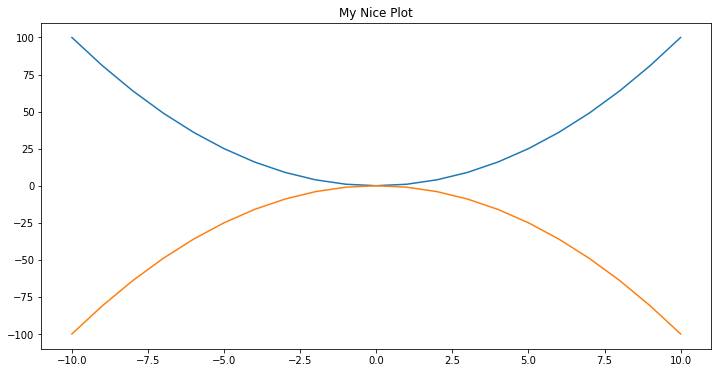

In [136]:
plt.figure(figsize=(12, 6))

plt.title('My Nice Plot')

plt.plot(x, x ** 2)
plt.plot(x, -1 * (x ** 2))

Text(0, 0.5, 'X Squared')

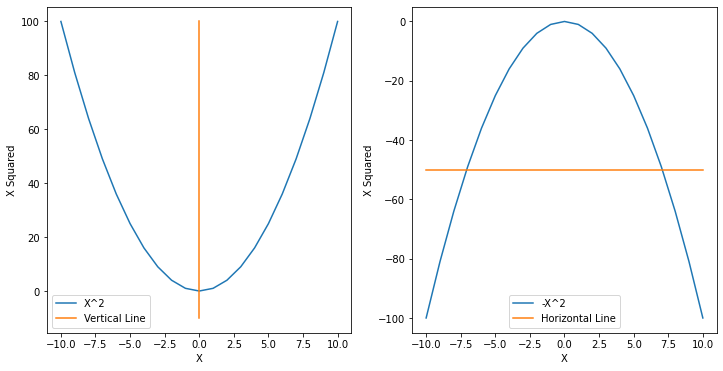

In [137]:
plt.figure(figsize=(12, 6))
plt.title('My Nice Plot')

plt.subplot(1, 2, 1)  # rows, columns, panel selected
plt.plot(x, x ** 2)
plt.plot([0, 0, 0], [-10, 0, 100])
plt.legend(['X^2', 'Vertical Line'])
plt.xlabel('X')
plt.ylabel('X Squared')

plt.subplot(1, 2, 2)
plt.plot(x, -1 * (x ** 2))
plt.plot([-10, 0, 10], [-50, -50, -50])
plt.legend(['-X^2', 'Horizontal Line'])

plt.xlabel('X')
plt.ylabel('X Squared')

### OOP Interface

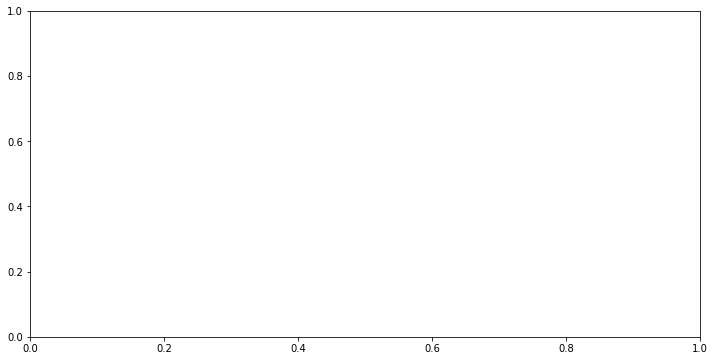

In [138]:
fig, axes = plt.subplots(figsize=(12, 6))

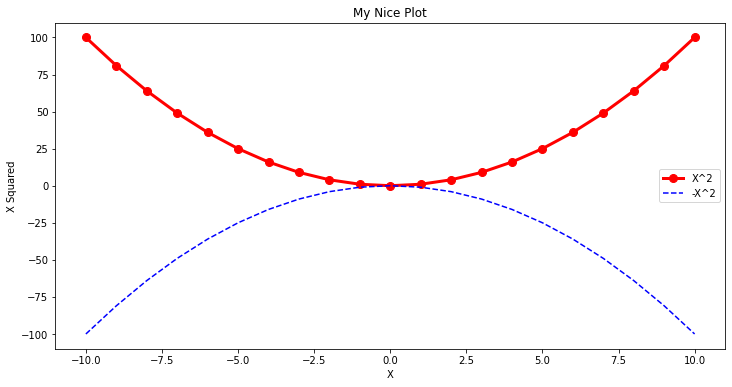

In [139]:
axes.plot(
    x, (x ** 2), color='red', linewidth=3,
    marker='o', markersize=8, label='X^2')

axes.plot(x, -1 * (x ** 2), 'b--', label='-X^2')

axes.set_xlabel('X')
axes.set_ylabel('X Squared')

axes.set_title("My Nice Plot")

axes.legend()

fig

Text(0.5, 1.0, 'My Nice Plot')

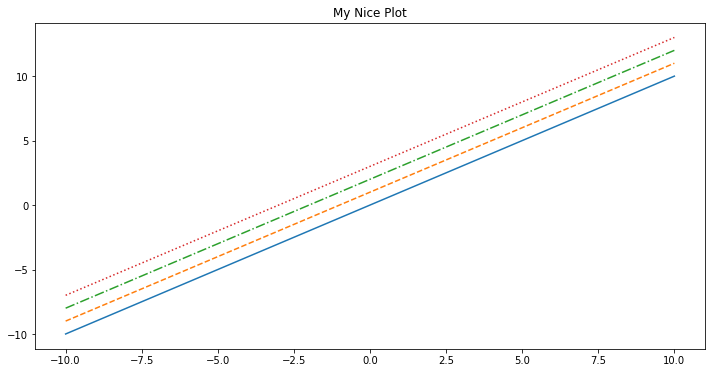

In [140]:
fig, axes = plt.subplots(figsize=(12, 6))

axes.plot(x, x + 0, linestyle='solid')
axes.plot(x, x + 1, linestyle='dashed')
axes.plot(x, x + 2, linestyle='dashdot')
axes.plot(x, x + 3, linestyle='dotted');

axes.set_title("My Nice Plot")

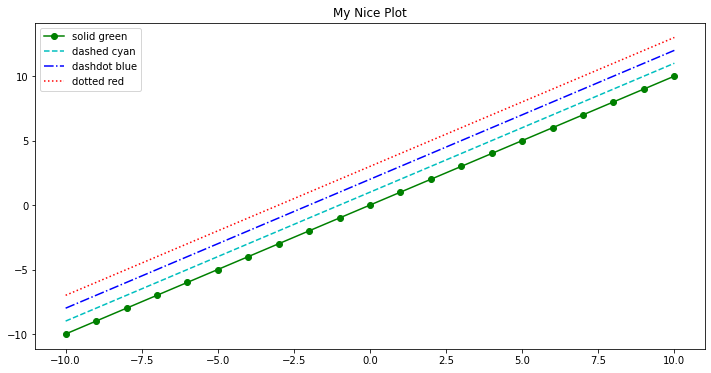

In [141]:
fig, axes = plt.subplots(figsize=(12, 6))

axes.plot(x, x + 0, '-og', label="solid green")
axes.plot(x, x + 1, '--c', label="dashed cyan")
axes.plot(x, x + 2, '-.b', label="dashdot blue")
axes.plot(x, x + 3, ':r', label="dotted red")

axes.set_title("My Nice Plot")

axes.legend()

There are a lot of line and marker types.

In [142]:
print('Markers: {}'.format([m for m in plt.Line2D.markers]))

Markers: ['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_', 'P', 'X', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'None', None, ' ', '']


In [143]:
linestyles = ['_', '-', '--', ':']

print('Line styles: {}'.format(linestyles))

Line styles: ['_', '-', '--', ':']


### Figures and subfigures

When we call the `subplots()` function we get a tuple containing a `Figure` and a `axes` element.

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1f123daed0>)

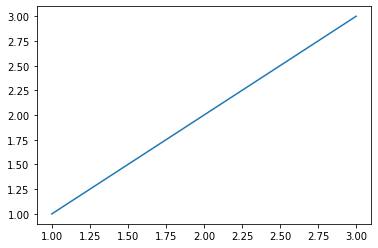

In [144]:
plot_objects = plt.subplots()

fig, ax = plot_objects

ax.plot([1,2,3], [1,2,3])

plot_objects

We can also define how many elements we want inside our figure. To do that we can set the `nrows` and `ncols` params.

(<Figure size 1008x432 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f1258c650>,
       dtype=object))

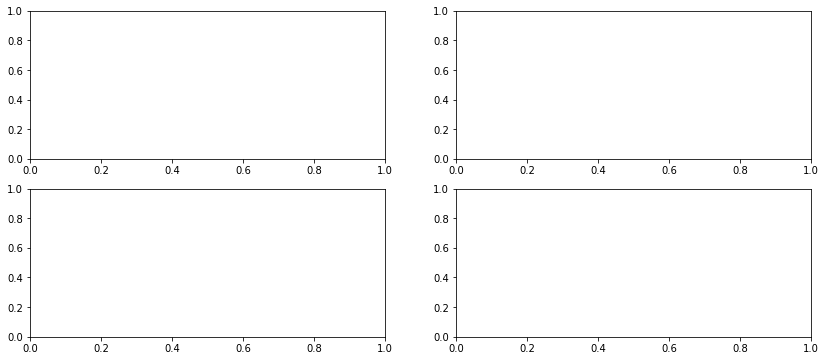

In [145]:
plot_objects = plt.subplots(nrows=2, ncols=2, figsize=(14, 6))

fig, ((ax1, ax2), (ax3, ax4)) = plot_objects

plot_objects

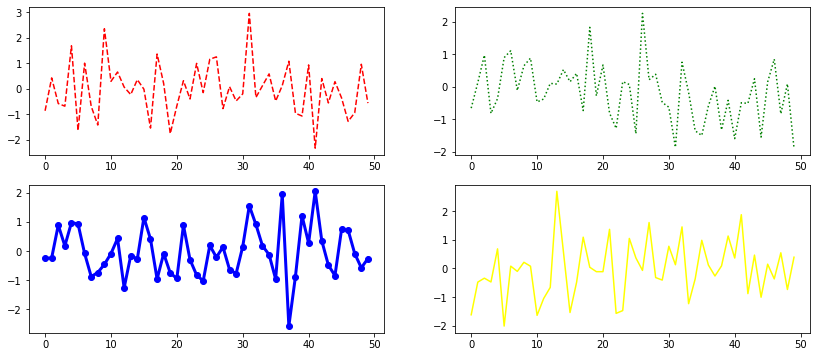

In [146]:
ax4.plot(np.random.randn(50), c='yellow')
ax1.plot(np.random.randn(50), c='red', linestyle='--')
ax2.plot(np.random.randn(50), c='green', linestyle=':')
ax3.plot(np.random.randn(50), c='blue', marker='o', linewidth=3.0)


fig

#### The `subplot2grid` command

There is another way to make subplots using a grid-like format:

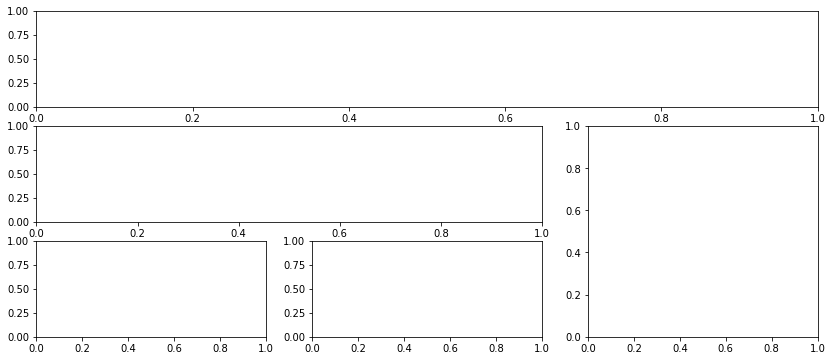

In [147]:
plt.figure(figsize=(14, 6))

ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))

### Scatter Plot

In [148]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (20 * np.random.rand(N))**2  # 0 to 15 point radii

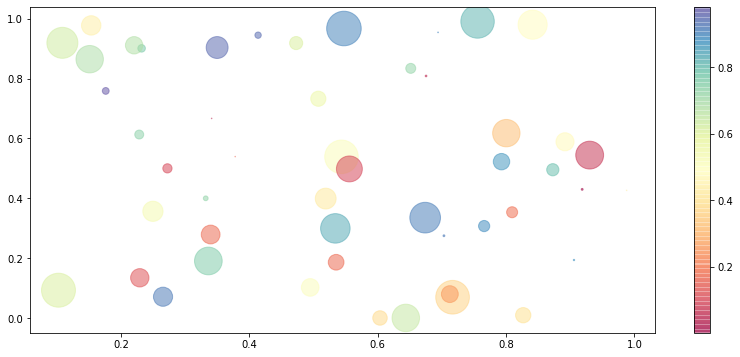

In [149]:
plt.figure(figsize=(14, 6))

plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Spectral')
plt.colorbar()

plt.show()

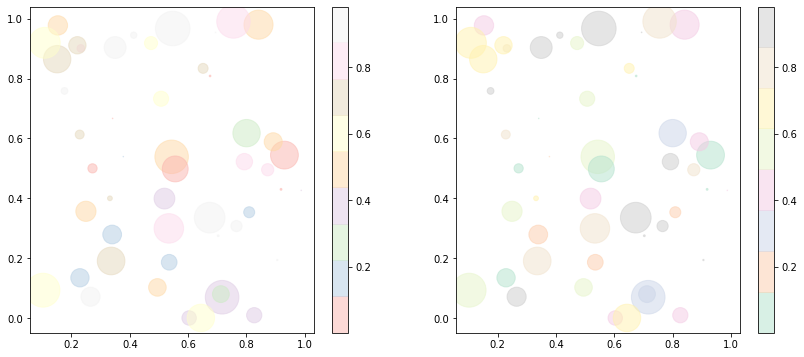

In [150]:
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1,2,1)
plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Pastel1')
plt.colorbar()

ax2 = fig.add_subplot(1,2,2)
plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Pastel2')
plt.colorbar()

plt.show()

Here is the full `cmap` options available: https://matplotlib.org/users/colormaps.html

### Histograms

In [151]:
values = np.random.randn(1000)

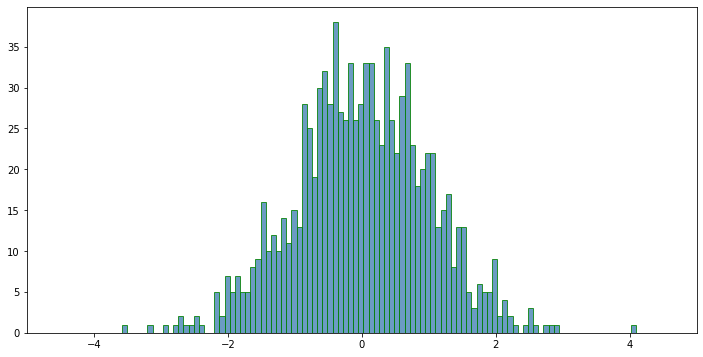

In [152]:
plt.subplots(figsize=(12, 6))

plt.hist(values, bins=100, alpha=0.8,
          histtype='bar', color='steelblue',
          edgecolor='green')
plt.xlim(xmin=-5, xmax=5)

plt.show()

In [153]:
fig.savefig('hist.png')

### KDE (kernel density estimation)

In [154]:
from scipy import stats

density = stats.kde.gaussian_kde(values)
density

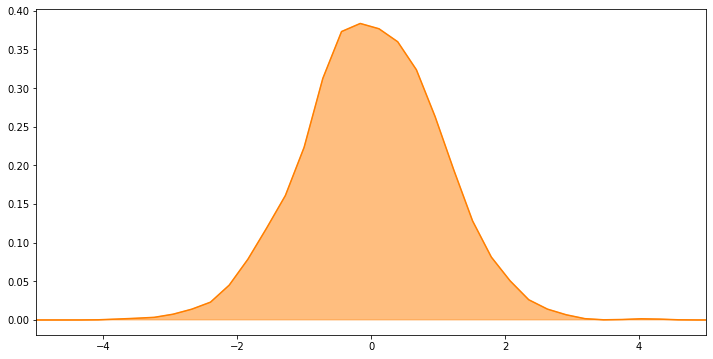

In [155]:
plt.subplots(figsize=(12, 6))

values2 = np.linspace(min(values)-10, max(values)+10, 100)

plt.plot(values2, density(values2), color='#FF7F00')
plt.fill_between(values2, 0, density(values2), alpha=0.5, color='#FF7F00')
plt.xlim(xmin=-5, xmax=5)

plt.show()

### Combine plots

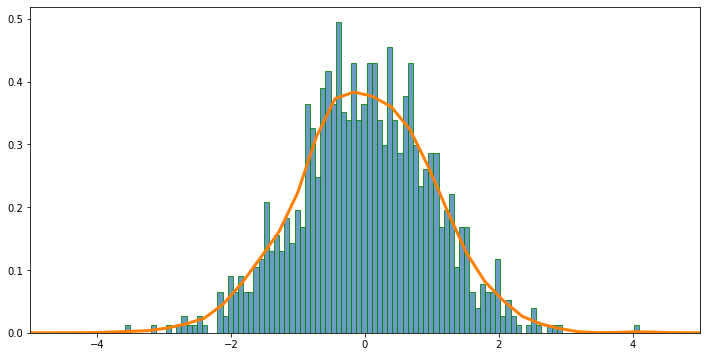

In [156]:
plt.subplots(figsize=(12, 6))

plt.hist(values, bins=100, alpha=0.8, density=1,
          histtype='bar', color='steelblue',
          edgecolor='green')

plt.plot(values2, density(values2), color='#FF7F00', linewidth=3.0)
plt.xlim(xmin=-5, xmax=5)

plt.show()

### Bar plots

In [157]:
Y = np.random.rand(1, 5)[0]
Y2 = np.random.rand(1, 5)[0]

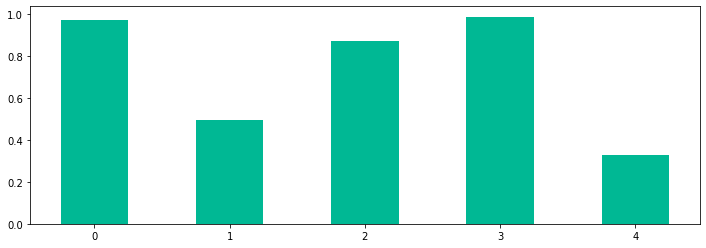

In [158]:
plt.figure(figsize=(12, 4))

barWidth = 0.5
plt.bar(np.arange(len(Y)), Y, width=barWidth, color='#00b894')

plt.show()

Also can be stacked bars, and add a legend to the plot:

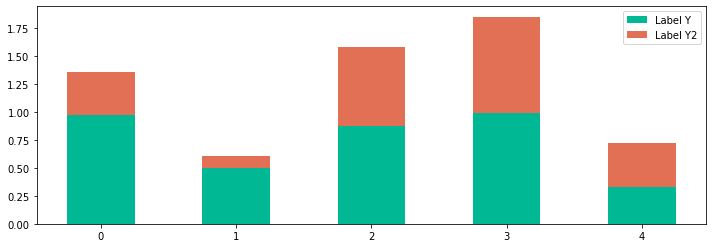

In [159]:
plt.figure(figsize=(12, 4))

barWidth = 0.5
plt.bar(np.arange(len(Y)), Y, width=barWidth, color='#00b894', label='Label Y')
plt.bar(np.arange(len(Y2)), Y2, width=barWidth, color='#e17055', bottom=Y, label='Label Y2')

plt.legend()
plt.show()

### Boxplots and outlier detection

In [160]:
values = np.concatenate([np.random.randn(10), np.array([10, 15, -10, -15])])

(array([1., 1., 0., 0., 5., 5., 0., 0., 1., 1.]),
 array([-15., -12.,  -9.,  -6.,  -3.,   0.,   3.,   6.,   9.,  12.,  15.]),
 <a list of 10 Patch objects>)

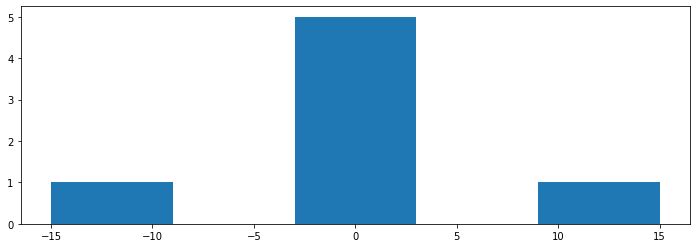

In [161]:
plt.figure(figsize=(12, 4))

plt.hist(values)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1f04a55690>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1f04a4df90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1f04a55210>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1f04a20a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1f04a206d0>],
 'means': []}

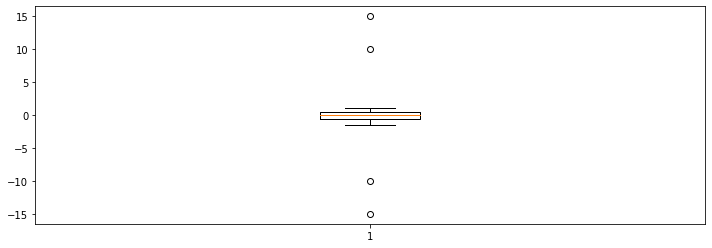

In [162]:
plt.figure(figsize=(12, 4))

plt.boxplot(values)

# Example:

Let's get started by importing Bitcoin and Ether data:

In [163]:
df = pd.read_csv(
    'btc-eth-prices-outliers.csv',
    index_col=0,
    parse_dates=True
)

In [164]:
df.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


And now we can run a simple visualization:

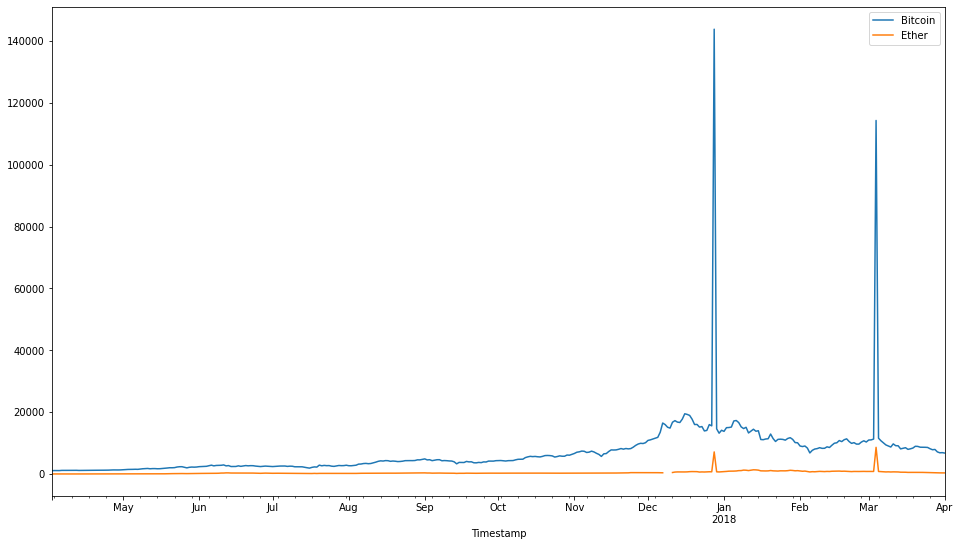

In [165]:
df.plot(figsize=(16, 9))

There are clearly some invalid values, both ETH and BTC have huge spikes. On top of that, there seems to be some data missing in Ether between December 2017 and and January 2018:

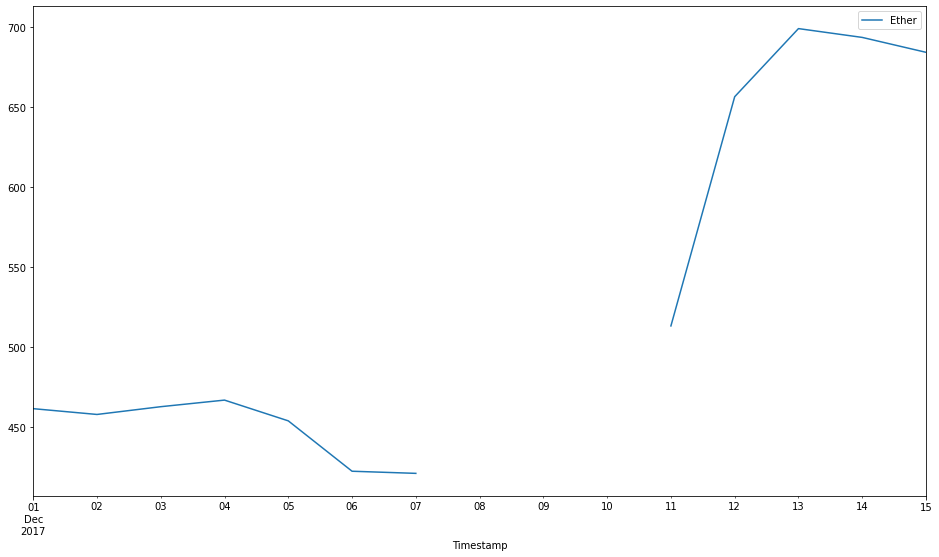

In [166]:
df.loc['2017-12': '2017-12-15'].plot(y='Ether', figsize=(16, 9))

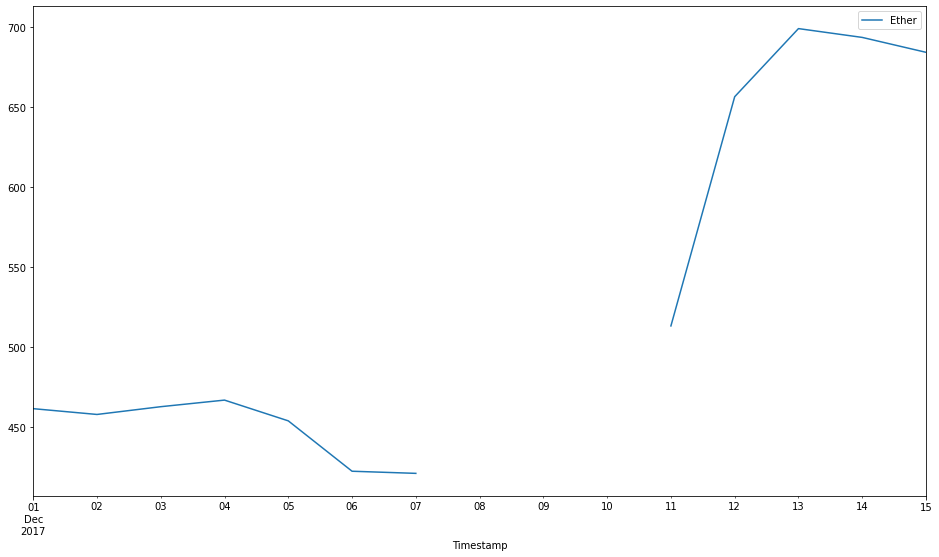

In [167]:
df.loc['2017-12': '2017-12-15'].plot(y='Ether', figsize=(16, 9))

In [168]:
df_na = df.loc['2017-12': '2017-12-15']

Are those null values?

In [169]:
df_na['Ether'].isna().values.any()

True

When? what periods of time?

In [170]:
df_na.loc[df_na['Ether'].isna()]

,Bitcoin,Ether
Timestamp,,
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN


Let's add a little bit more context:

In [171]:
df.loc['2017-12-06': '2017-12-12']

,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


We now need to decide what we'll do with the missing values. Drop them? fill them? If we decide to fill them, what will be use as fill value? For example: we can use the previous value and just assume the price stayed the same.

In [172]:
df.loc['2017-12-06': '2017-12-12'].fillna(method='bfill')

,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,513.29
2017-12-09,15142.834152,513.29
2017-12-10,14869.805000,513.29
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


In [173]:
df.fillna(method='bfill', inplace=True)

Let's take a look now:

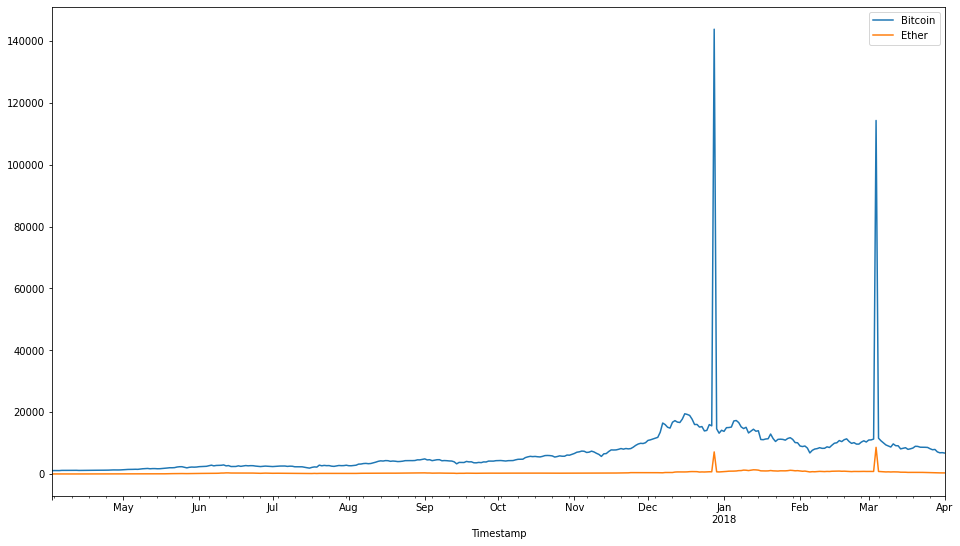

In [174]:
df.plot(figsize=(16, 9))

Much better. We now need to fix the huge spikes. The first step is identifying them. How can we do it? The simple answer is of course visually. They seem to be located in the last 10 days of Dec 2017 and first of March 2018:

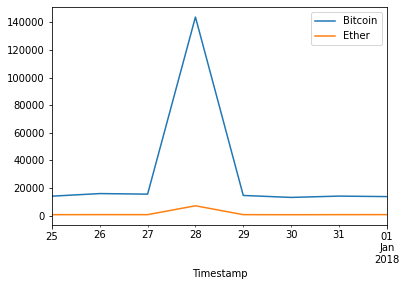

In [175]:
df['2017-12-25':'2018-01-01'].plot()

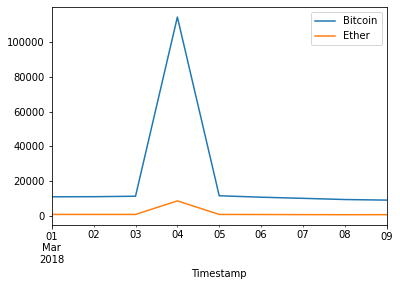

In [176]:
df['2018-03-01': '2018-03-09'].plot()

Apparently, they're located in '2017-12-28' and '2018-03-04':

In [177]:
df_cleaned = df.drop(pd.to_datetime(['2017-12-28', '2018-03-04']))

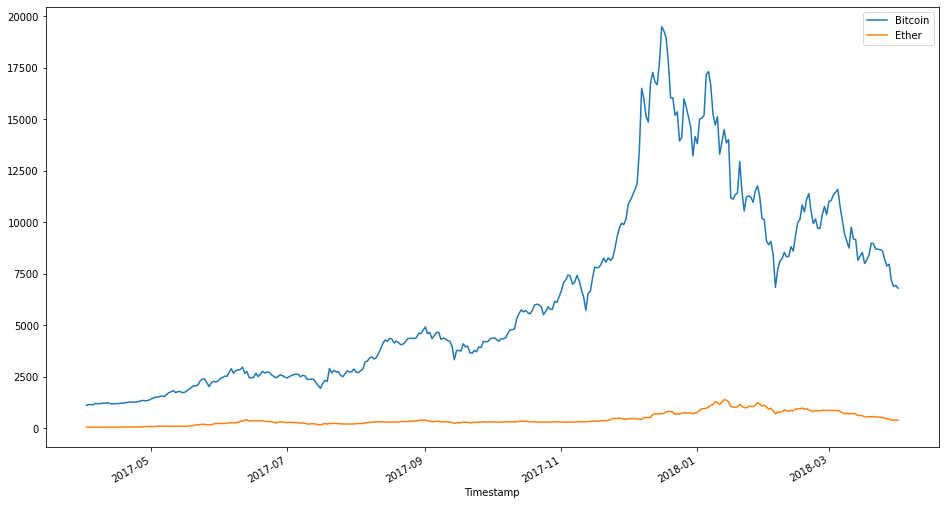

In [178]:
df_cleaned.plot(figsize=(16, 9))

Now it looks much better. Our data seems to be clean.

## Cleaning Analysis 

Visualizations helps make sense of the data and let us judge if our analysis and work is on the right track. But we need a more powerful method to handle our data. That's what we call "analysis". We'll use _analytical_ methods to identify these outliers or these skewed values.

### Central Tendency

We'll use a set of common indicators of to measure central tendency and identify these outliers:

##### mean
The mean is probably the most common and popular one. The problem is that it's really sensitive to outliers. The mean of our dataset with invalid values is:

In [179]:
df.mean()

Bitcoin    6996.004022
Ether       469.609068
dtype: float64

Both values seem too high. That's because the outliers are skewing with the mean:

In [180]:
df_cleaned.mean()

Bitcoin    6323.509186
Ether       428.628402
dtype: float64

##### median

In [181]:
df.median()

Bitcoin    4594.98785
Ether       309.49000
dtype: float64

##### mode

It doesn't make much sense to measure the mode, as we have continuous values. But you can do it just with `df.mode()`.

### Visualizing distribution

Now we can use a few of the charts that we saw before + seaborn to visualize the distribution of our values. In particular, we're interested in **histograms**:

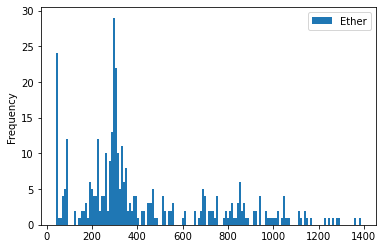

In [182]:
df_cleaned.plot(kind='hist', y='Ether', bins=150)

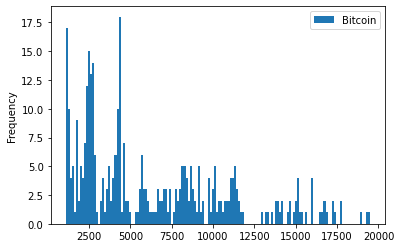

In [183]:
df_cleaned.plot(kind='hist', y='Bitcoin', bins=150)

Using seaborn:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


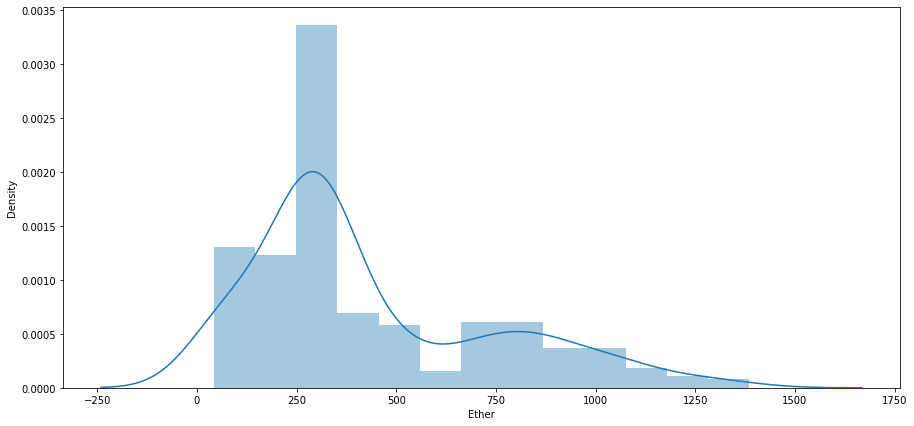

In [184]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Ether'], ax=ax)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


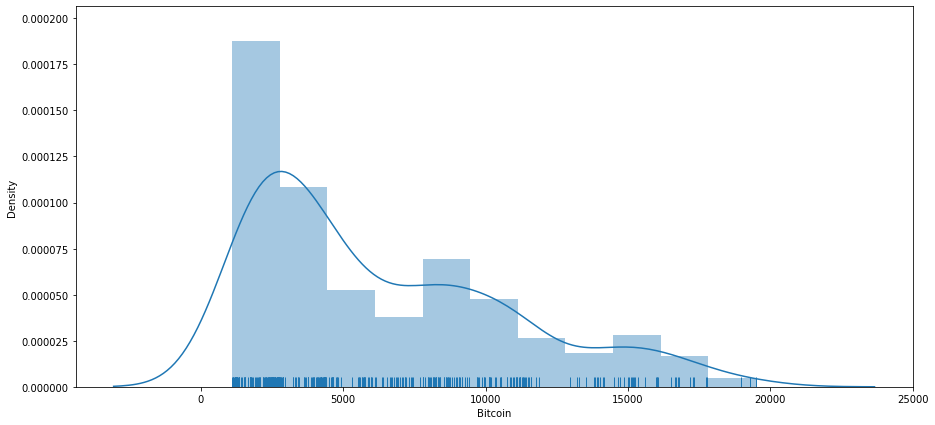

In [185]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], rug=True, ax=ax)

Seaborn's `distplot` is a general method that will plot a histogram, a KDE and a rugplot. You can also use them as separate:

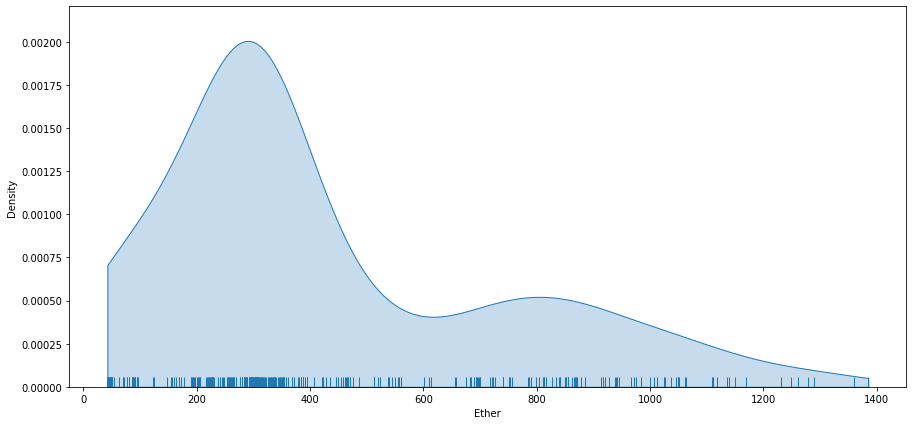

In [186]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.kdeplot(df_cleaned['Ether'], shade=True, cut=0, ax=ax)
sns.rugplot(df_cleaned['Ether'], ax=ax);

We can also visualize a cumulative plot of our distribution:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


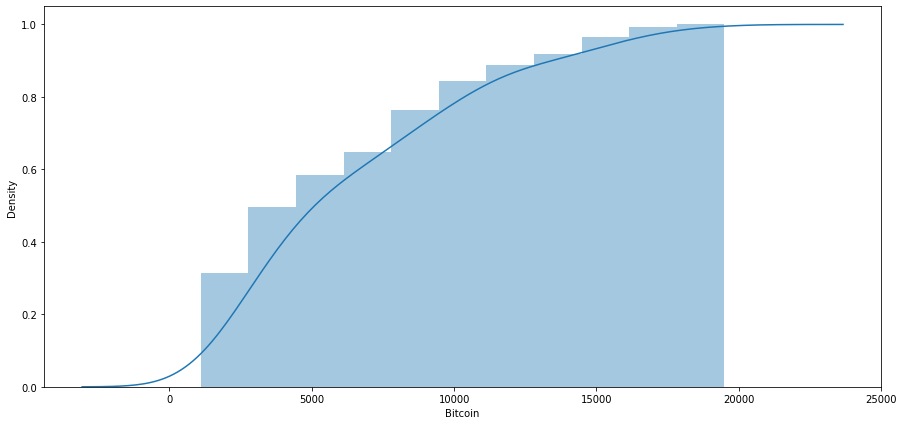

In [187]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], ax=ax,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))


This plot shows how many samples fall behind a certain value. We can increase the number of bins in order to have more detail:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


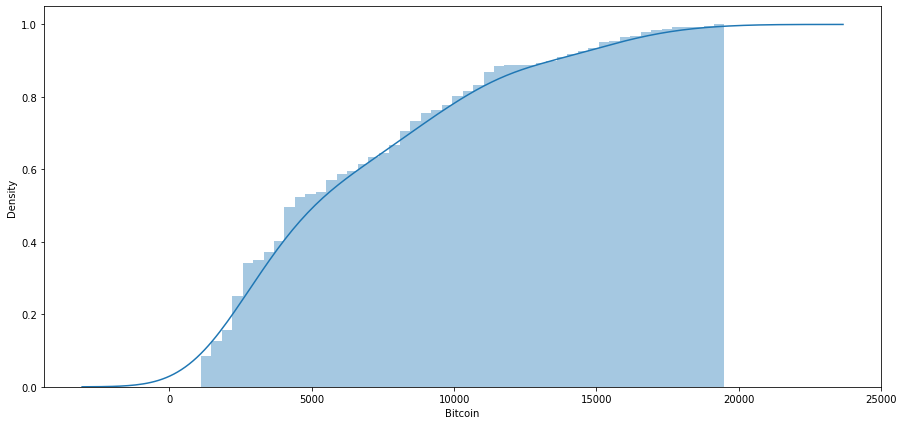

In [188]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))


### Visualizing bivariate distributions

The most common way to observe a bivariate distribution is a scatterplot, the `jointplot` will also include the distribution of the variables:

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


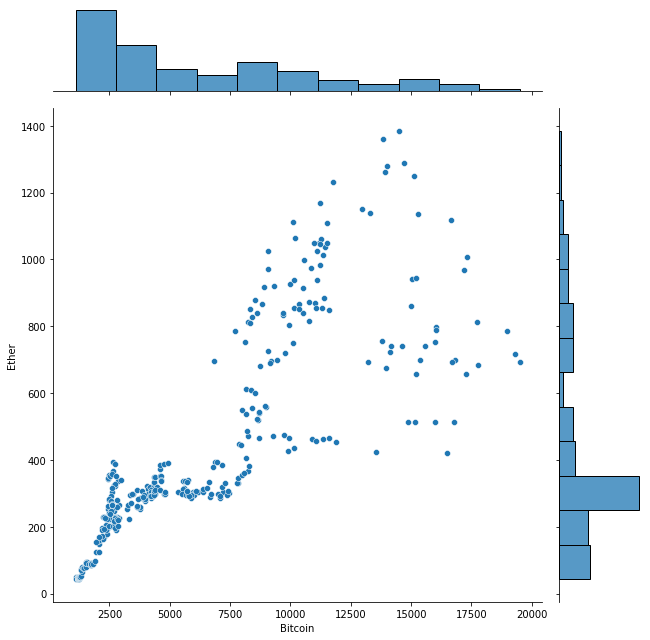

In [189]:
sns.jointplot(x="Bitcoin", y="Ether", data=df_cleaned, size=9)

If you want only a scatter plot, you can use the `regplot` method, that also fits a linear regression model in the plot:

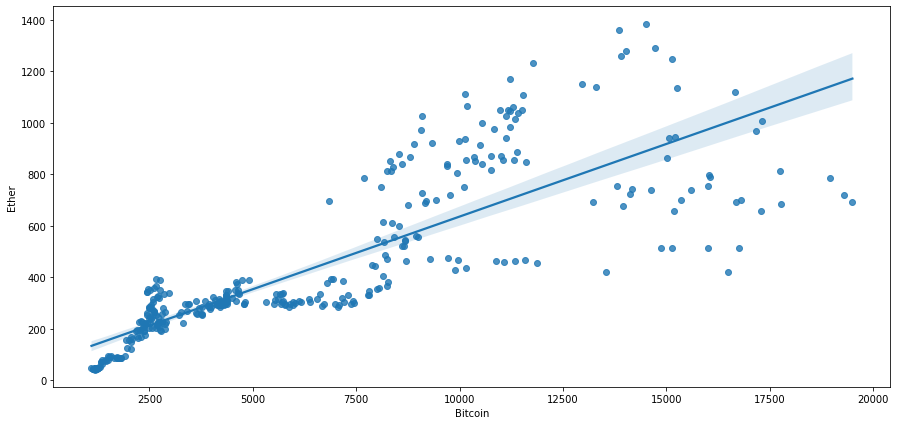

In [190]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.regplot(x="Bitcoin", y="Ether", data=df_cleaned, ax=ax)

### Quantiles, quartiles and percentiles

In [191]:
df_cleaned['Bitcoin'].quantile(.2)

2438.8627342857144

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


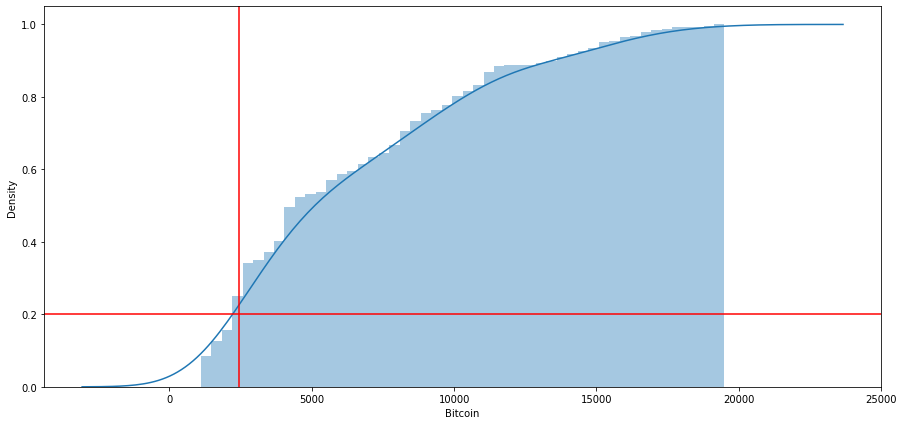

In [192]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
ax.axhline(0.2, color='red')
ax.axvline(df_cleaned['Bitcoin'].quantile(.2), color='red')

In [193]:
df_cleaned['Bitcoin'].quantile(.5)

4580.387479999999

In [194]:
df_cleaned['Bitcoin'].median()

4580.387479999999

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


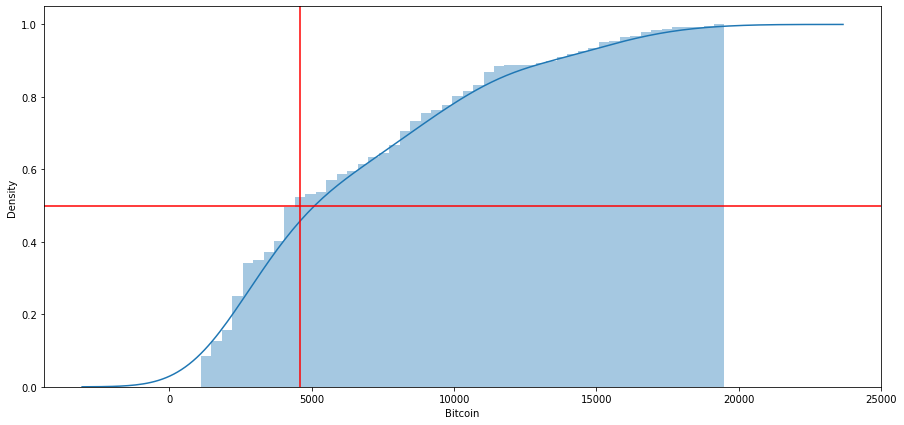

In [195]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
ax.axhline(0.5, color='red')
ax.axvline(df_cleaned['Bitcoin'].quantile(.5), color='red')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


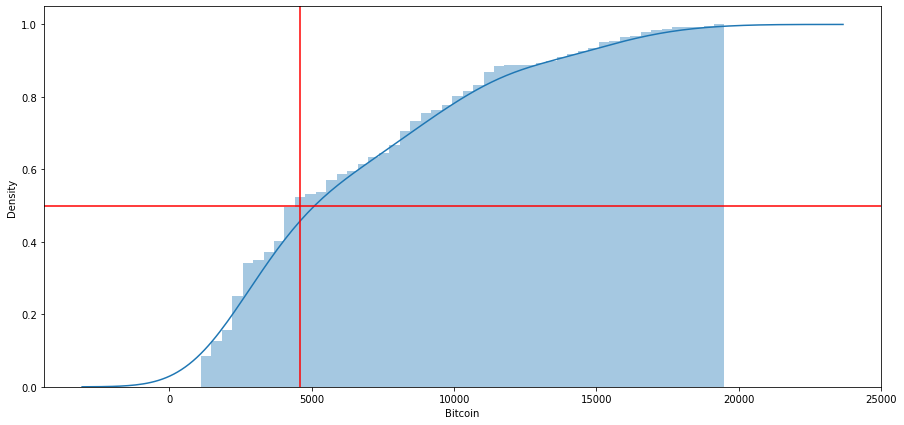

In [196]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
ax.axhline(0.5, color='red')
ax.axvline(df_cleaned['Bitcoin'].median(), color='red')

Quantile `0.25` == Percentile `25%` == Quartile `1st`

## Dispersion

We'll use a few methods to measure dispersion in our dataset, most of them well known:

* Range
* Variance and Standard Deviation
* IQR

##### Range

Range is fairly simple to understand, it's just the max - min values:

In [197]:
df['Bitcoin'].max() - df['Bitcoin'].min()

142706.6475416667

Range is **really** sensitive to outliers. As you can see, the range value is extremely high (might indicate the presence of outliers / invalid values).

In [198]:
df_cleaned['Bitcoin'].max() - df_cleaned['Bitcoin'].min()

18399.51420833333

This value now makes a lot more sense. We know that Bitcoin had a high in about 20k, and it was around 900 when we started measuring. It makes more sense now.

##### Variance and Standard Deviation

In [199]:
df['Bitcoin'].var()

103766537.75278121

In [200]:
df['Bitcoin'].std()

10186.586167739475

Both variance and std are sensible to outliers as well. We can check with our cleaned dataset:

In [201]:
df_cleaned['Bitcoin'].std()

4513.757662530282

### IQR

The [Interquartile range](https://en.wikipedia.org/wiki/Interquartile_range) is a good measure of "centered" dispersion, and is calculated as `Q3 - Q1` (3rd quartile - 1st quartile).

In [202]:
df['Bitcoin'].quantile(.75) - df['Bitcoin'].quantile(.25)

6597.494147619047

In [203]:
df_cleaned['Bitcoin'].quantile(.75) - df_cleaned['Bitcoin'].quantile(.25)

6548.249242559523

IQR is more robust than std or range, because it's not so sensitive to outliers.




### Analytical Analysis of invalid values

The measurements to analyze those values that seem invalid.

##### Using `std`: Z scores

Define those values that are a couple of Z scores above or below the mean (or the max/min value). Example:

In [204]:
upper_limit = df['Bitcoin'].mean() + 2 * df['Bitcoin'].std()
lower_limit = df['Bitcoin'].mean() - 2 * df['Bitcoin'].std()

In [205]:
print("Upper Limit: {}".format(upper_limit))
print("Lower Limit: {}".format(lower_limit))

Upper Limit: 27369.17635730169
Lower Limit: -13377.16831365621


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


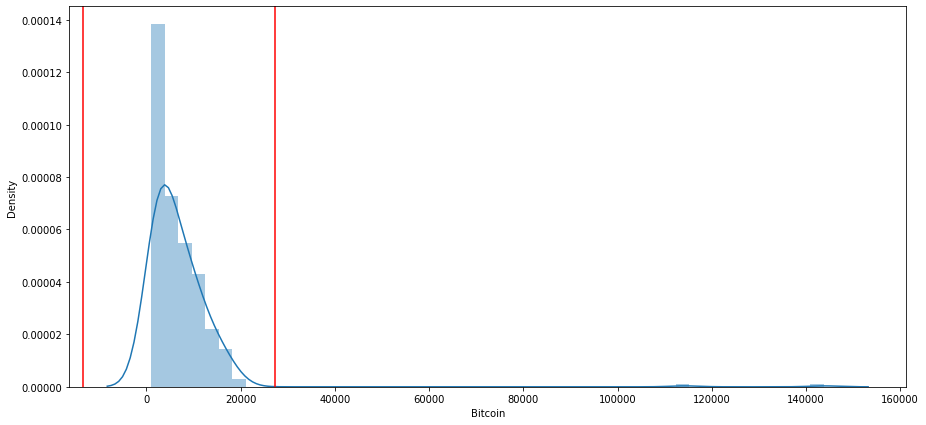

In [206]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df['Bitcoin'], ax=ax)
ax.axvline(lower_limit, color='red')
ax.axvline(upper_limit, color='red')

lower limit doesn't make a lot of sense, as negative values are invalid. But upper limit has a really good measure. Anything above \$27,369 is considered to be an invalid value.

##### Using IQRs

The IQR instead of std if we think that the standard deviation might be **too** affected by the outliers/invalid values.

In [207]:
iqr = df['Bitcoin'].quantile(.75) - df['Bitcoin'].quantile(.25)
iqr

6597.494147619047

In [208]:
upper_limit = df['Bitcoin'].mean() + 2 * iqr
lower_limit = df['Bitcoin'].mean() - 2 * iqr

In [209]:
print("Upper Limit: {}".format(upper_limit))
print("Lower Limit: {}".format(lower_limit))

Upper Limit: 20190.992317060834
Lower Limit: -6198.9842734153535


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


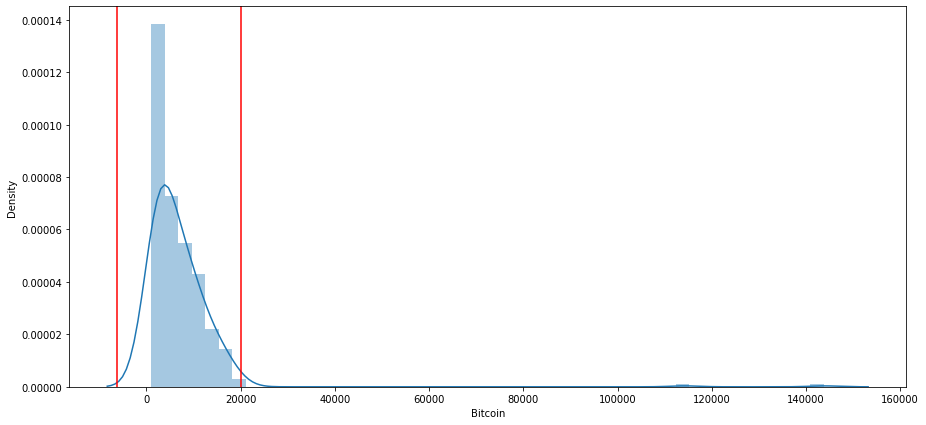

In [210]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df['Bitcoin'], ax=ax)
ax.axvline(lower_limit, color='red')
ax.axvline(upper_limit, color='red')

Our measurement now is a little bit less precise. There are a few valid values (20k) that seem to be above our upper limit. Regardless, it's still a good indicator.

### Cleaning invalid values analytically

Remove these invalid values analytically, we'll use the upper limit defined by standard deviation:

In [211]:
upper_limit = df['Bitcoin'].mean() + 2 * df['Bitcoin'].std()

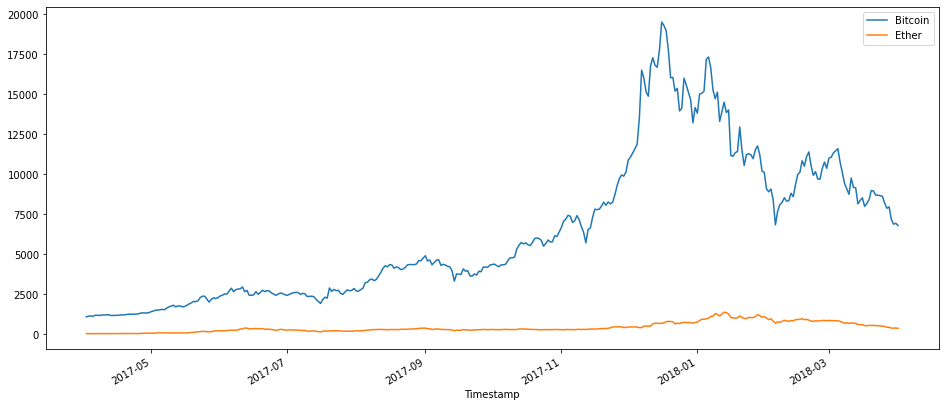

In [212]:
df[df['Bitcoin'] < upper_limit].plot(figsize=(16, 7))

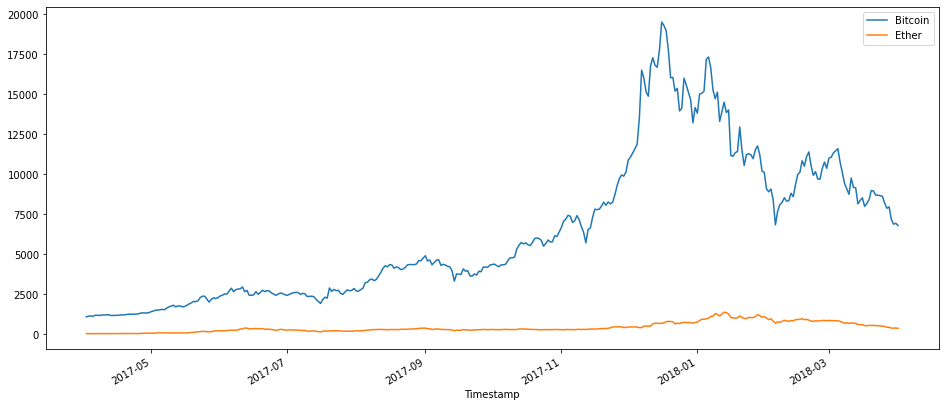

In [213]:
df.drop(df[df['Bitcoin'] > upper_limit].index).plot(figsize=(16, 7))